In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# better display of review text in dataframes
pd.set_option('display.max_colwidth', None) 

# Seaborn options
sns.set(style="whitegrid", font_scale=1.4)

%load_ext autoreload
%autoreload 2

# Learning curves

In [2]:
import pickle

# 1. TF-IDF
tfidf_accuracies, tfidf_sizes = [], []
with open('data/tf-idf/tfidf_accuracies.pickle', 'rb') as reader:
    dic = pickle.load(reader)
    tfidf_accuracies = dic["test_accuracies"]
    tfidf_sizes = dic["sizes"]
    
# 2. FASTTEXT
fasttext_accuracies, fasttext_sizes = [], []
with open('data/word-vectors/fasttext_accuracies.pickle', 'rb') as reader:
    dic = pickle.load(reader)
    fasttext_accuracies = dic["test_accuracies"]
    fasttext_sizes = dic["sizes"]
    
# 3. RNN
rnn_accuracies, rnn_sizes = [], []
with open('data/word-vectors/rnn_accuracies.pickle', 'rb') as reader:
    dic = pickle.load(reader)
    rnn_accuracies = dic["test_accuracies"]
    rnn_sizes = dic["sizes"]
    
# 4. CNN
cnn_accuracies, cnn_sizes = [], []
with open('data/word-vectors/cnn_accuracies.pickle', 'rb') as reader:
    dic = pickle.load(reader)
    cnn_accuracies = dic["test_accuracies"]
    cnn_sizes = dic["sizes"]
    
# 5. CamemBERT
bert_accuracies, bert_sizes = [], []
with open('data/bert/camembert_accuracies.pickle', 'rb') as reader:
    dic = pickle.load(reader)
    bert_accuracies = dic["test_accuracies"]
    bert_sizes = dic["sizes"]

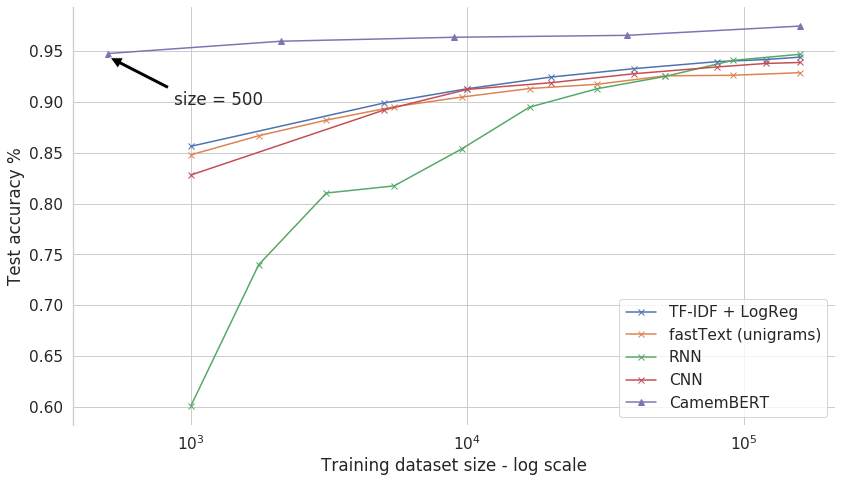

In [3]:
fig = plt.figure(figsize=(12,7))

plt.plot(tfidf_sizes, tfidf_accuracies, 'x-')
plt.plot(fasttext_sizes, fasttext_accuracies, 'x-')
plt.plot(rnn_sizes, rnn_accuracies, 'x-')
plt.plot(cnn_sizes, cnn_accuracies, 'x-')
plt.plot(bert_sizes, bert_accuracies, '^-')

# Annotate BERT result with 500 training examples
plt.annotate('size = 500', xy=(495, 0.945), xytext=(0.25, 0.8), 
             textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )

plt.xlabel('Training dataset size - log scale')
plt.ylabel('Test accuracy %')
plt.legend(['TF-IDF + LogReg', 'fastText (unigrams)', 'RNN', 'CNN', 'CamemBERT'], loc='lower right')

# Finalize the plot
sns.despine(bottom=True)
plt.xscale('log')
plt.tight_layout(h_pad=2)

# Saving plot
fig.savefig('img/learning_curves.png', dpi=200)

# Inference time

In [2]:
def add_times_to_df(path, df, model_name):
    with open(path, 'rb') as reader:
        times = pickle.load(reader)
        df = df.append(
            pd.DataFrame([[model_name, 1000*time] for time in times], columns=["model", "times"]),
            ignore_index=True
        )
    return df

In [3]:
import pickle

time_data = pd.DataFrame()

# 1. TF-IDF
time_data = add_times_to_df(
    'data/tf-idf/tfidf_times.pickle',
    time_data, 'TF-IDF')
    
# 2. fastText
time_data = add_times_to_df(
    'data/word-vectors/fasttext_times.pickle',
    time_data, 'fastText')

# 3. RNN
time_data = add_times_to_df(
    'data/word-vectors/rnn_times.pickle',
    time_data, 'RNN')

# 4. CNN
time_data = add_times_to_df(
    'data/word-vectors/cnn_times.pickle',
    time_data, 'CNN')

# 5. CamemBERT
time_data = add_times_to_df(
    'data/bert/camembert_times.pickle',
    time_data, 'CamemBERT')

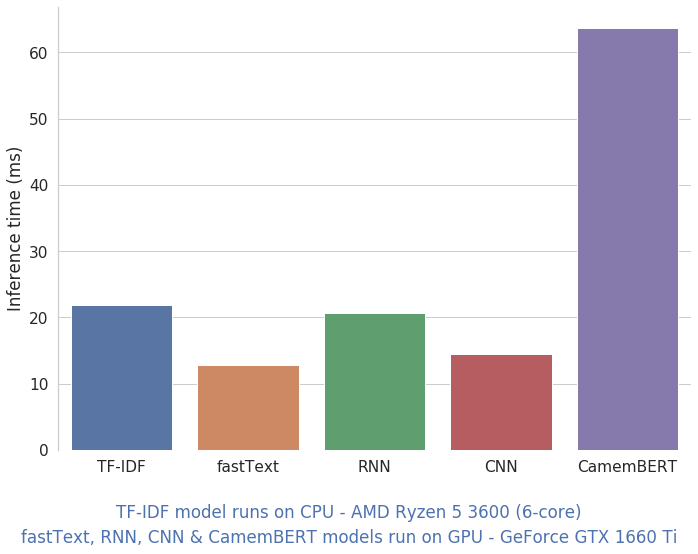

In [11]:
fig = plt.figure(figsize=(10,7))

plt.figtext(.5, -0.05, 'TF-IDF model runs on CPU - AMD Ryzen 5 3600 (6-core)', ha='center', color='b')
plt.figtext(.5, -0.1, 'fastText, RNN, CNN & CamemBERT models run on GPU - GeForce GTX 1660 Ti', ha='center', color='b')

sns.barplot(x='model', y='times', data=time_data, ci=None) # capsize=.2)
plt.xlabel('')
plt.ylabel('Inference time (ms)')

# Text

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=10)

# Saving plot
fig.savefig('img/inference_time.png', bbox_inches = "tight", dpi=200)